<a href="https://colab.research.google.com/github/hhanhvu99/CS114.L21.KHCL/blob/main/FinalProject/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114.L21.KHCL - MÁY HỌC</b></h1>
<h1 align="center"><b>ĐỒ ÁN CUỐI KÌ</b></h1>
<h1 align="center"><b>Đề tài: Phát hiện ổ gà, ổ vịt trên đường</b></h1>

**Giảng viên**
- Lê Đình Duy
- Phạm Nguyễn Trường An

**Thành viên**
- Huỳnh Đỗ Anh Vũ - 18521665 - 18521665@gm.uit.edu.vn
- Phan Khắc Cường	 - 18520548 - 18520548@gm.uit.edu.vn
- Đặng Trần Hồng Hà - 19520504 - 19520504@gm.uit.edu.vn

**Giới thiệu bài toán**

- Những ai từng đi xe máy không ít thì nhiều cũng gặp ổ gà ổ vịt trên đường, nhất là trong mùa mưa này khi mà đường bị sụp lún rất nhiều, dễ gây ra nguy hiểm nếu chúng ta không để ý. 

- Nên nhóm chọn đồ án này với hy vọng xây dựng ra một model máy học giúp xác định chính xác vị trí các ổ gà, ổ vịt trên đường, và từ model này nhóm hy vọng sẽ góp phần trong việc tạo ra một ứng dụng giúp cảnh báo người dùng về các ổ gà ổ vịt ở phía trước, giúp giảm thiểu nguy cơ xảy ra tai nạn, hoặc hy vọng model sẽ được ứng dụng trong xe tự hành.

**1. Mô tả bài toán**
+ **Input**: một hình ảnh RGB hoặc một đoạn video stream trực tiếp từ điện thoại, có chứa một hoặc nhiều con đường chỉ có đường đất và đường nhựa, ngoài ra không tính các đường nào khác. Con đường có thể chứa ổ gà ổ vịt hoặc không, và đường có thể chứa xe cộ hoặc người đi đường và ổ gà ổ vịt có thể bị che mất. Điều kiện tối thiểu phải nhìn được con đường 2m trước mặt. Góc thu nhận hình ảnh (chụp hoặc stream video) nằm trong khoảng từ 10 độ đến 60 độ lấy đầu người nhìn thẳng làm chuẩn (xem hình để hiểu rõ, hình tạo từ PowerPoint).

  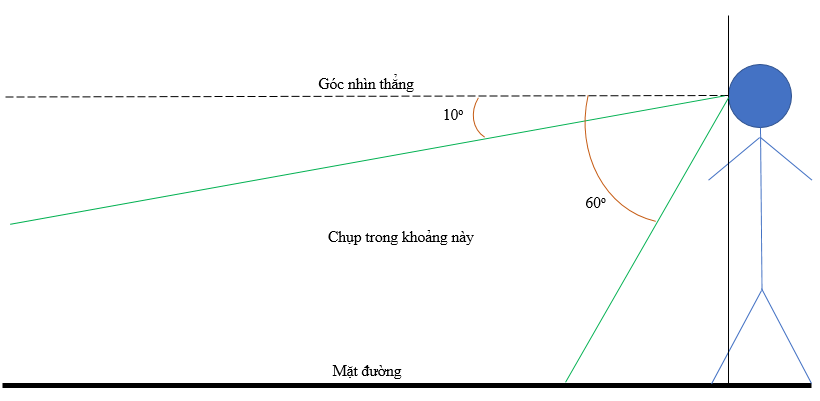
+ **Output**: một tập D các prediction của model gồm (c<sub>i</sub>, l<sub>i</sub>, x<sub>i</sub>, y<sub>i</sub>, w<sub>i</sub>, h<sub>i</sub>) với i chạy từ 1 tới D. Trong đó:

    **c<sub>i</sub>** là mức độ tự tin của model cho prediction này

    **l<sub>i</sub>** là nhãn cho prediction này

    **x<sub>i</sub>**, **y<sub>i</sub>** là center của Bounding Box trong ảnh

    **w<sub>i</sub>**, **h<sub>i</sub>** là chiều dài và chiều rộng của Bounding Box

+ **Số nhãn** trong model có 3 nhãn dự kiến là ổ gà, ổ vịt và ổ voi. Đường được coi là có 3 loại ổ trên khi trên đường có chỗ bị thủng lỗ. Tiêu chuẩn dự kiến của nhóm trong việc phân loại là: ổ gà có lỗ với đường kính là khoảng 30 cm trở xuống, ổ vịt có lỗ với đường kính là khoảng 30 cm đến khoảng 60 cm, và từ khoảng 60 cm trở lên được xem là ổ voi. Tiêu chuẩn và số nhãn có thể thay đổi trong tương lại tùy thuộc vào bộ data mà nhóm thu thập.


**2. Mô tả về bộ dữ liệu**

*2.1. Cách thức xây dựng bộ dữ liệu:*

- Toàn bộ dataset sẽ được nhóm chụp và gán nhãn cho từng ảnh. Nhóm sẽ dùng điện thoại để chụp ảnh các con đường. Góc chụp và điều kiện chụp giống phần Mô tả bài toán.
- Về vị trí chụp nhóm dự kiến chụp con đường và hẻm ở làng đại học, đường quốc lộ 1A, các con đường nhỏ gần nhà các thành viên trong nhóm. 
- Các thông tin cá nhân như địa chỉ nhà, biển số xe, mặt người,... sẽ bị làm mờ hoặc cắt đi.
- Nhóm dự kiến dùng bộ công cụ LabelImg trên GitHub (https://github.com/tzutalin/labelImg) của tác giả darrenl để gán nhãn và dùng đoạn code từ GitHub (https://github.com/skanelo/Face-Mask-Detection/blob/main/xml_to_yolo.py) của tác giả Stefanos Kanellopoulos để chuyển label từ định dạng xml sang định dạng YOLO.

*2.2. Số lượng và độ đa dạng của bộ dữ liệu:*

- Về số lượng, nhóm dự kiến sẽ chụp khoảng 1000 bức hình chứa các con đường.
- Về độ đa dạng, các ổ trong con đường được chụp dưới nhiều góc khác nhau, và nhiều khoảng cách khác nhau, con đường có thể có ổ hoặc không có ổ, con đường có thể vắng hoặc có phương tiên giao thông và người đi bộ, các ổ trên đường có thể bị che mất hoặc không. Góc chụp giống phần Mô tả bài toán. Điều kiện tối thiểu phải nhìn được 2m trước mặt, vì nhóm nghĩ rằng nếu không nhìn thấy ổ trong khoảng đó thì con người sẽ không kịp xử lý, tuy nhiên khoảng này chỉ là dự kiến và có thể sẽ thay đổi trong tương lai. Đối với số lượng chụp cho 1 ổ nhóm dự kiến sẽ có khoảng 12 bức cho 1 ổ (nếu có nhiều ổ trong ảnh thì làm nhóm chụp giống như 1 ổ), chia thành 3 nhóm khoảng cách gần, trung và xa, mỗi nhóm sẽ chụp ở 4 góc khác nhau, cụ thể góc chụp như thế nào và khoảng cách bao nhiêu thì hiện tại nhóm vẫn chưa quyết định.

*2.3. Tiền xử lý dữ liệu:*

- Sau khi thu thập được đủ tất cả các hình, nhóm sẽ tiến hành công đoạn tiền xử lý. Đầu tiên nhóm loại bỏ những bức hình nào bị mờ hoặc chụp bị lỗi, nghĩa là không thấy được con đường bằng mắt thường nếu nhìn vào trong ảnh hoặc những bức chụp sai góc (phần *Mô tả bài toán*), hoặc những bức bị lỗi như có vật chắn gần hết mọi thứ trong ảnh hoặc những bức ảnh chụp sai nội dung (VD: ảnh gia đình, bạn bè,...).
- Tiếp theo nhóm thực hiện việc che giấu các thông tin cá nhân có trên ảnh như biển số xe, mặt người, địa chỉ nhà,...
- Tiếp đến nhóm đặt tên lại toàn bộ bức ảnh theo con đường chụp, ảnh nào chụp chung 1 con đường thì đặt chung thành 1 tên và đặt tên theo khoảng cách cộng với số để phân biệt. VD: có 3 ảnh 0.jpg, 1.jpg và 2.jpg cùng chụp chung 1 con đường ở ba khoảng cách khác nhau thì nhóm sẽ đặt tên lại dưới dạng duongMot_gan_0.jpg, duongMot_trung_1.jpg, duongMot_xa_2.jpg. Nhóm đặt tên như vậy để thuận tiện cho việc tổng hợp dữ liệu báo cáo và gán nhãn dữ liệu.
- Cuối cùng nhóm tiến hành gán nhãn cho từng bức ảnh dùng công cụ (phần *Cách thức xây dựng bộ dữ liệu*), dựa vào khoảng cách trên tên của bức ảnh và tiêu chí phân loại nhãn (phần *Mô tả bài toán*).

*2.4. Phân chia train/dev/test:*

- Nhóm dự kiến sẽ làm trên mạng YOLOv3 và mạng này không có tập test mà dùng tập dev cho cả dev và test (Nguồn: https://github.com/pjreddie/darknet/issues/491).
- Lúc đầu nhóm dự kiến sẽ chia 80/20 cho train/test (dev=test), sau đó nhóm sẽ tiếp tục chạy thử nghiệm trên tỉ lệ 70/30 như đã đề xuất ở đây: https://www.researchgate.net/post/Is-there-an-ideal-ratio-between-a-training-set-and-validation-set-Which-trade-off-would-you-suggest
- Dữ liệu sẽ được chia ngẫu nhiên cho 2 tập train và test theo tỉ lệ.

**3. Mô tả về đặc trưng**

- Trước hết nhóm sẽ nhìn qua các bức ảnh sau, các ảnh dưới đây nhóm tạm dùng để làm ví dụ, khi đã có data nhóm sẽ dùng các ảnh trong đó để làm ví dụ:

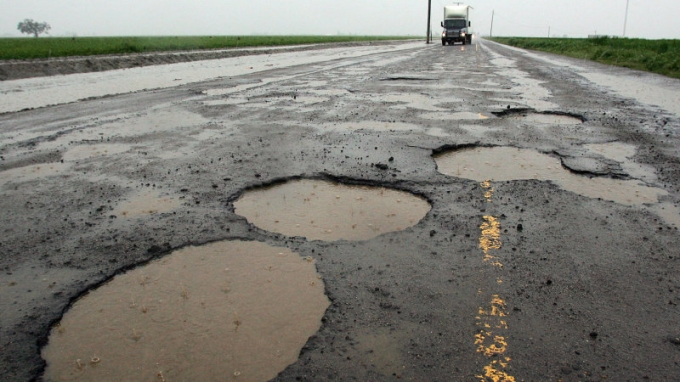

(Nguồn: http://www.tapchigiaothong.vn/google-phat-trien-he-thong-canh-bao-o-ga-cho-xe-hoi-d14231.html)

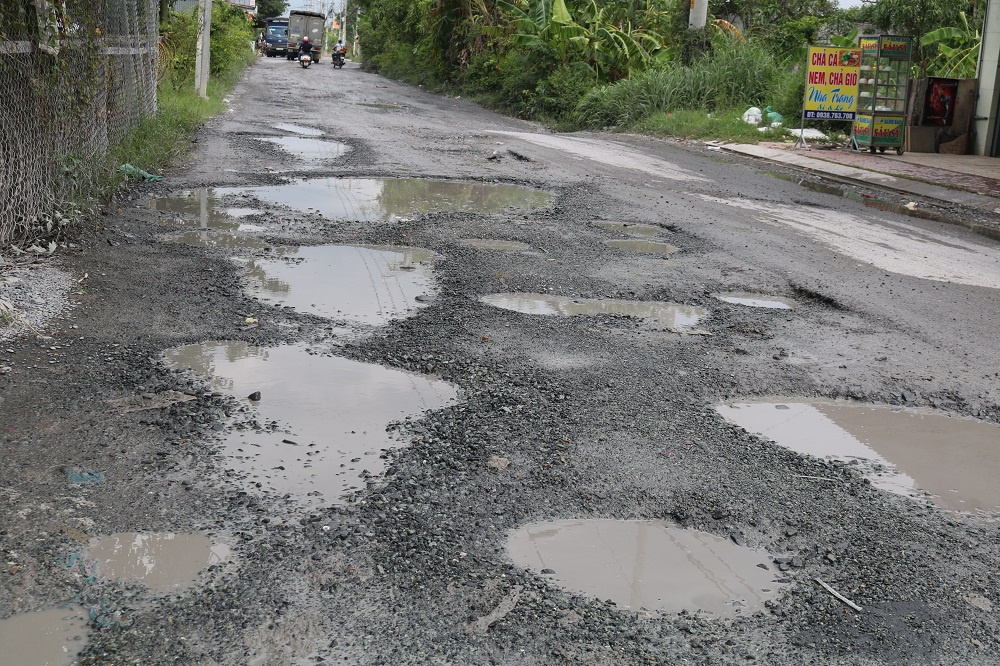

(Nguồn: https://thanhnien.vn/doi-song/hon-100m-duong-chi-chit-o-ga-o-voi-dan-buc-xuc-vi-am-anh-tai-nan-1120308.html)

- Qua hai ảnh trên, nhóm thấy rằng các ổ gà, ổ vịt đều có các đặc điểm sau: 

1.   Các ổ đều nằm giữa mặt đường
2.   Có vũng nước hoặc không có vũng nước trong ổ
3.   Có hình dáng chung là vòng tròn
4.   Các ổ có kích thước khác nhau, và góc chụp khác nhau
5.   Điều kiện thời tiết và ánh sáng khác nhau

- Từ những điểm chung đó, và bản chất bài toán nhóm làm là Object Detection, tức là phải xác định object đó nằm chỗ nào và phải phân loại object đó, thì nhóm nhận thấy rằng từ những đặc trưng mà các thành viên đã học, chỉ có 1 đặc trưng là phù hợp là CNN. Một lí do nữa là hiện tại bài toán Object Detection đa số bài báo đều sử dụng đặc trưng học sâu CNN (Nguồn: https://paperswithcode.com/task/object-detection) nên nhóm quyết định dùng đặc trưng này cho đồ án.


**4. Mô tả thuật toán máy học**

4.1. Model và lí do chọn:

- Hiện tại nhóm dự kiến sẽ dùng mạng YOLOv3 cho để thực hiện đồ án này. Lí do nhóm chọn YOLOv3 là vì tốc độ của nó nhanh nhưng đổi lại độ chính xác của nó không cao (theo bài báo YOLOv3: An Incremental Improvement của 2 tác giả Joseph Redmon và Ali Farhadi). Vì model này có thể ứng dụng trong thực tế, chạy trên video live stream trực tiếp từ điện thoại nên nhóm nghĩ rằng nên chọn model nào có tốc độ detect nhanh. Một lí do nữa là tuy YOLOv3 có tốc độ chạy cao, nhưng phiên bản v3 hiện tại là từ năm 2018 (Nguồn: https://paperswithcode.com/sota/real-time-object-detection-on-coco), và hiện nay có bản khác nhanh hơn, chính xác hơn bản v3, cụ thể là bản YOLOv4 (Nguồn: https://paperswithcode.com/method/yolov4#), nhưng nhóm vẫn chọn YOLOv3 là vì có thành viên trong nhóm đã có kinh nghiệm làm việc trên YOLOv3, nên nhóm thấy rằng dùng phiên bản mà nhóm đã có kinh nghiệm làm sẽ tốt hơn các phiên bản mới.